# Table of Contents

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
 - 3.1 [**Installing Libraries**](#Section301)<br>
 - 3.2 [**Upgrading Libraries**](#Section302)<br>
 - 3.3 [**Importing Libraries**](#Section303)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
  
##  Prepare data (split into train data and test data). Inspect Data.
## Train your model
## Predict on test data 
## Evaluate the model
## Create more models




**Columns**           **DataType**	         **Description**
- Sex	            -- nominal	       -- M, F, and I (infant)
- Length	        -- continuous      -- longest shell measurement (mm)
- Diameter          -- continuous	   -- perpendicular to length (mm)
- Height	        -- continuous	   -- with meat in shell (mm)
- Whole Weight	    -- continuous	   -- whole abalone (grams)
- Shucked Weight	-- continuous	   -- weight of meat (grams)
- Viscera Weight	-- continuous	   -- gut weight after bleeding (grams)
- Shell Weight	    -- continuous	   -- after being dried (grams)
- Rings	            -- integer	       -- +1.5 gives the age in years

- The abalone add one ring to their shell every year, except in their first year 
- we can estimate the age of the abalone quite accurately by adding 1.5 to the number of rings.

In [1]:
#install Seaborn package. Comment after running once.
!pip install seaborn
!pip install statsmodels
!pip install -q datascience                                       
!pip install -q pandas-profiling
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
print('Installed...')

Installed...


In [2]:
# 1. Import required libraries
import pandas as pd   #read, DataFrames
import numpy as np    #array and math operations
from sklearn.linear_model import LinearRegression  #linear regression
from sklearn import metrics
import math      
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline  

In [3]:
!pip install -q --upgrade pandas-profiling    

In [4]:
# 2. Load data

Abalone_train = pd.read_csv('abalone_train.csv',index_col=0)        # Abalone data for training is loaded
Abalone_test = pd.read_csv('abalone_test.csv',index_col=0)    # Abalone data for testing is loaded

In [5]:
# Check the head of the data (first few rows)
Abalone_train.tail()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Id,,,,,,,,,
1033,M,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770,10
3264,F,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850,12
1653,M,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535,10
2607,F,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185,9
2732,I,0.410,0.325,0.110,0.3260,0.1325,0.0750,0.1010,8


In [6]:
Abalone_train.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [7]:
Abalone_test.tail()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
Id,,,,,,,,
575,F,0.610,0.475,0.140,1.1330,0.5275,0.2355,0.350
3231,M,0.410,0.325,0.120,0.3745,0.1580,0.0810,0.125
1084,I,0.445,0.345,0.105,0.4090,0.1675,0.1015,0.117
290,M,0.540,0.435,0.180,0.9960,0.3835,0.2260,0.325
2713,I,0.250,0.175,0.060,0.0635,0.0275,0.0080,0.020


In [8]:
Abalone_test.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
dtype: int64

In [9]:
print(Abalone_train.shape)
print(Abalone_test.shape)

(3341, 9)
(836, 8)


In [10]:
# Summary Statistics
Abalone_train.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,0.525887,0.409463,0.140129,0.838176,0.363600,0.182507,0.241385,9.958396
std,0.119759,0.098895,0.042623,0.493789,0.224156,0.110439,0.139828,3.205591
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.444500,0.188000,0.093500,0.132000,8.000000
50%,0.545000,0.425000,0.145000,0.810000,0.341500,0.172500,0.235000,10.000000
75%,0.620000,0.485000,0.165000,1.168500,0.509500,0.255500,0.330000,11.000000
max,0.815000,0.650000,1.130000,2.779500,1.488000,0.760000,1.005000,27.000000


In [11]:
# Summary Statistics
Abalone_test.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,0.516417,0.401561,0.137069,0.791042,0.342452,0.172949,0.228623
std,0.121196,0.100419,0.038410,0.474981,0.212260,0.105973,0.136280
min,0.140000,0.105000,0.020000,0.014500,0.005000,0.003000,0.005000
25%,0.445000,0.345000,0.110000,0.432625,0.177875,0.091500,0.121000
50%,0.535000,0.420000,0.140000,0.770750,0.320250,0.161250,0.220000
75%,0.610000,0.475000,0.165000,1.097375,0.472000,0.242625,0.315000
max,0.770000,0.620000,0.240000,2.825500,1.146500,0.641500,0.897000


In [12]:
Abalone_train.skew()

Length           -0.635960
Diameter         -0.608490
Height            3.739177
Whole_weight      0.515061
Shucked_weight    0.717250
Viscera_weight    0.585675
Shell_weight      0.604484
Rings             1.112529
dtype: float64

The skewness values can be interpreted in the following manner:

- Highly skewed distribution: number of rings are highly skewed

- Moderately skewed distribution: If the skewness value is between −1 and −0.5(Length and diameter) or between +0.5 and +1(Weights). All weights variables are 0.51 to 0.72 
- A positive skewness indicates that the size of the right-handed tail is larger than the left-handed tail.




In [13]:
Abalone_test.skew()

Length           -0.656208
Diameter         -0.611550
Height           -0.273292
Whole_weight      0.589928
Shucked_weight    0.707934
Viscera_weight    0.607108
Shell_weight      0.687698
dtype: float64

**Observations**
- Surprised to note heights distribution is symmetrical in test part of dataset
- Rest of the distributions are similar to train part

In [14]:
Abalone_train.info(verbose = True, memory_usage = 'deep', show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3341 entries, 3141 to 2732
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3341 non-null   object 
 1   Length          3341 non-null   float64
 2   Diameter        3341 non-null   float64
 3   Height          3341 non-null   float64
 4   Whole_weight    3341 non-null   float64
 5   Shucked_weight  3341 non-null   float64
 6   Viscera_weight  3341 non-null   float64
 7   Shell_weight    3341 non-null   float64
 8   Rings           3341 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 424.2 KB


In [15]:
from pandas_profiling import ProfileReport

profile = ProfileReport(Abalone_train,title="Abalone_train Profiling before Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="Abalone_profiling_before_preprocessing.html")
print('Accomplished!')

Accomplished!


**Observation:**

- Reports shows that the number of variables in our data is 9.

- Number of observations(rows) is 3341 in training dataset and 836 in testing dataset, a total of 4177

- Duplicate rows are 0

- There is no missing data.

- *Shell weight seems to have higher percent of outliers in lower extremes*

- *Height seems to have higher percent of outliers in lower extremes*

- For full details checkout the report.

In [16]:
#Abalone_train['Age'] = Abalone_train['Rings']+1.5
#Abalone_train.drop(['Id'], axis=1,inplace = True)
#Abalone_train.drop(['Rings'], axis=1,inplace = True)
#Abalone_test.drop(['Id'], axis=1,inplace = True )
print(Abalone_train.shape)
print(Abalone_test.shape)
Abalone_train.head()

(3341, 9)
(836, 8)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Id,,,,,,,,,
3141,I,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
3521,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
883,M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3627,M,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
2106,M,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14



- We can also drop off Rings as anyways this is used to calculate Age and this is 'y' our dataset 

<AxesSubplot:>

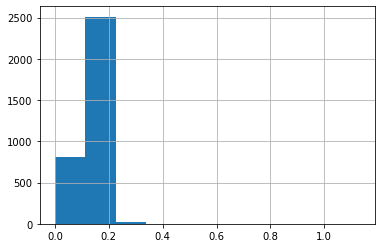

In [17]:
Abalone_train['Height'].hist()

In [18]:
#filling for zero values in height
Abalone_train['Height'] = Abalone_train['Height'].replace(0, 0.145000)  

<AxesSubplot:>

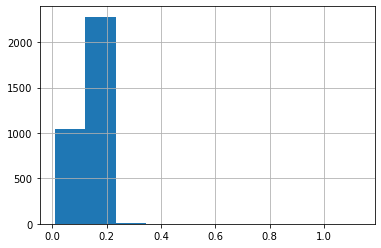

In [19]:
#check distribution after filling for zero values in height
#Abalone_train['Height']=np.log1p(Abalone_train['Height'])
Abalone_train['Height'].hist()

<AxesSubplot:>

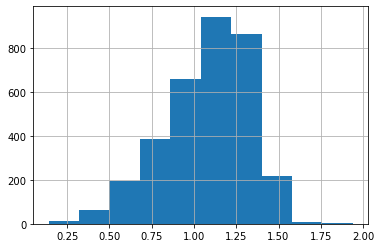

In [20]:
#feature engineering of length, dia and height in train 
Abalone_train['Dimension']=Abalone_train['Length']+Abalone_train['Diameter']+Abalone_train['Height']
Abalone_train['Dimension'].hist()

<AxesSubplot:>

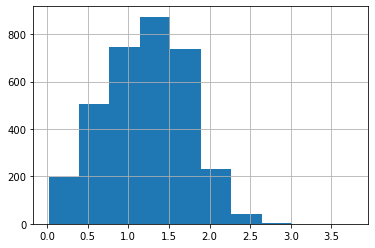

In [21]:
#feature engineering of length, dia and height in train and square dimension 
Abalone_train['Dimension']=np.square(Abalone_train['Dimension'])
Abalone_train['Dimension'].hist()

<AxesSubplot:>

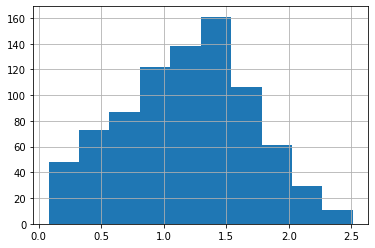

In [22]:
#feature engineering of length, dia and height in train and square dimension 
Abalone_test['Dimension']=Abalone_test['Length']+Abalone_test['Diameter']+Abalone_test['Height']
Abalone_test['Dimension']=np.square(Abalone_test['Dimension'])
Abalone_test['Dimension'].hist()

<AxesSubplot:>

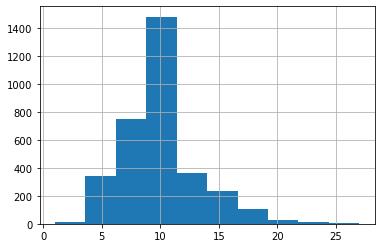

In [23]:
Abalone_train['Rings'].hist()

<AxesSubplot:>

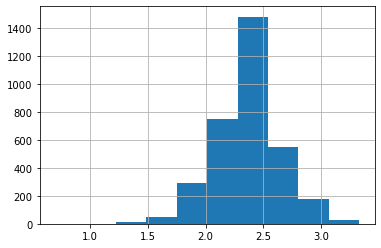

In [24]:
#feature engineering , log y
Abalone_train['Rings']=np.log1p(Abalone_train['Rings'])
Abalone_train['Rings'].hist()

<AxesSubplot:>

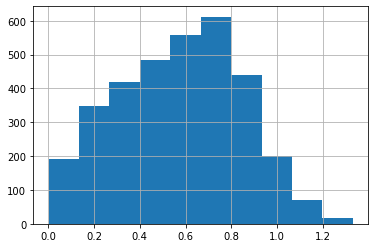

In [25]:
#feature engineering , log x
Abalone_train['Whole_weight']=np.log1p(Abalone_train['Whole_weight'])
(Abalone_train['Whole_weight']).hist()

<AxesSubplot:>

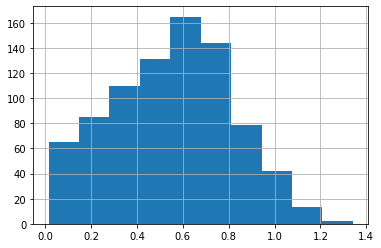

In [26]:
#feature engineering , log x in test
Abalone_test['Whole_weight']=np.log1p(Abalone_test['Whole_weight'])

(Abalone_test['Whole_weight']).hist()

In [27]:
Abalone_train.shape

(3341, 10)

In [28]:
#spliting train data set &dropping unengineered columns
Abalone_cat=Abalone_train[['Sex']]
Abalone_feat_cols = Abalone_train.drop(['Rings','Length','Diameter','Height'], axis=1)

In [29]:
#spliting test data set&dropping unengineered columns
Abalone_cat1=Abalone_test [['Sex']]
Abalone_feat_cols1= Abalone_test.drop(['Length','Diameter','Height'], axis=1)                   #.drop(['Sex'], axis=1)

In [30]:
Abalone_train['Sex'].value_counts()

M    1232
F    1058
I    1051
Name: Sex, dtype: int64

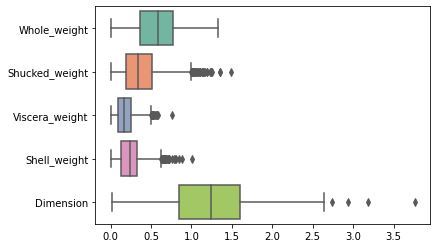

In [31]:
#boxplot to check the distribution of data
def lr():
    import seaborn as sns
    sns.boxplot(data=Abalone_feat_cols, orient="h", palette="Set2")
    return None 
lr()

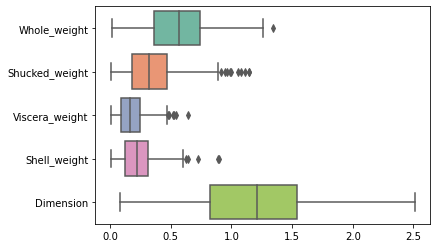

In [32]:
#boxplot to check the distribution of data
def lr():
    import seaborn as sns
    sns.boxplot(data=Abalone_feat_cols1, orient="h", palette="Set2")
    return None 
lr()

**Observations**
- looks like feature engineering of L, D & H into dimension really worked to our advantage having normal distribution 

In [33]:
#outlier removal, upto Z score=3std
import pandas as pd
def lr(Abalone_train):
    
    Q1 = Abalone_train.quantile(0.05)
    Q3 = Abalone_train.quantile(0.95)
    Q_diff = Q3 - Q1
    Abalone_out = Abalone_train[~((Abalone_train < (Q1 - Q_diff))|(Abalone_train > (Q3 + Q_diff))).any(axis=1)]
    print(Abalone_train[((Abalone_train < (Q1 - Q_diff))|(Abalone_train > (Q3 + Q_diff))).any(axis=1)])
    return Abalone_out
lr(Abalone_train)
Abalone_train=lr(Abalone_train)
print (Abalone_train)


     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
Id                                                                 
1763   M   0.775     0.630   0.250      1.329592          1.3485   
1417   M   0.705     0.565   0.515      1.166271          1.1075   
236    I   0.075     0.055   0.010      0.001998          0.0010   
2051   F   0.455     0.355   1.130      0.466247          0.3320   
1209   F   0.780     0.630   0.215      1.296643          1.4880   
163    F   0.725     0.560   0.210      1.144541          0.6500   

      Viscera_weight  Shell_weight     Rings  Dimension  
Id                                                       
1763          0.7600        0.5780  2.564949   2.739025  
1417          0.4865        0.5120  2.397895   3.186225  
236           0.0005        0.0015  0.693147   0.019600  
2051          0.1160        0.1335  2.197225   3.763600  
1209          0.4985        0.5860  2.484907   2.640625  
163           0.3980        1.0050  2.944439   2.

In [35]:
print(Abalone_train.shape)
print(Abalone_test.shape)

(3335, 10)
(836, 9)


In [36]:
print(Abalone_train.skew())
display(Abalone_test.skew())

Length           -0.632646
Diameter         -0.607514
Height           -0.243430
Whole_weight     -0.056070
Shucked_weight    0.671924
Viscera_weight    0.549931
Shell_weight      0.567117
Rings            -0.011989
Dimension        -0.055325
dtype: float64


Length           -0.656208
Diameter         -0.611550
Height           -0.273292
Whole_weight     -0.012606
Shucked_weight    0.707934
Viscera_weight    0.607108
Shell_weight      0.687698
Dimension        -0.027262
dtype: float64

**Observations**
- Amazingly, all x variables such as Dimension and whole_weight and y varibale Rings are normal distributed , this will be nice for our model

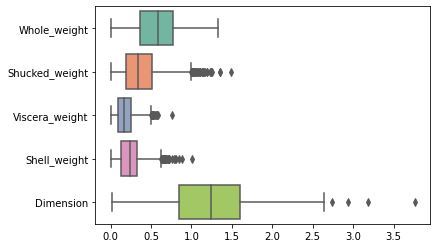

In [37]:
#boxplot to check the distribution of train data after removal of outliers
def lr():
    import seaborn as sns
    sns.boxplot(data=Abalone_feat_cols, orient="h", palette="Set2")
    return None 
lr()

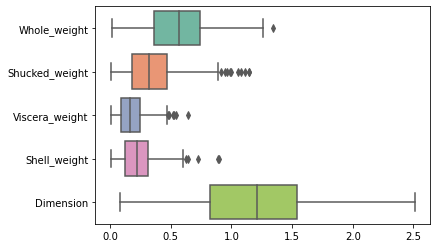

In [38]:
#boxplot to check the distribution of test data
def lr():
    import seaborn as sns
    sns.boxplot(data=Abalone_feat_cols1, orient="h", palette="Set2")
    return None 
lr()

<AxesSubplot:xlabel='Rings'>

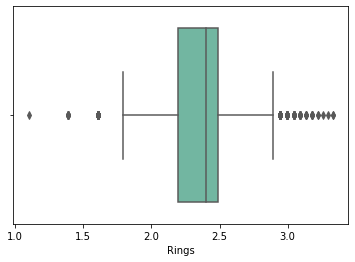

In [39]:
sns.boxplot(Abalone_train.Rings ,orient="h", palette="Set2")

<AxesSubplot:xlabel='Whole_weight', ylabel='Count'>

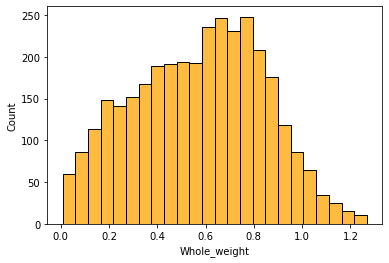

In [40]:
#Check for distribution after log
sns.histplot(Abalone_train['Whole_weight'], color='Orange')

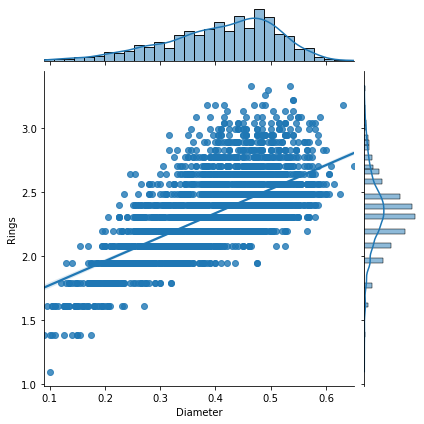

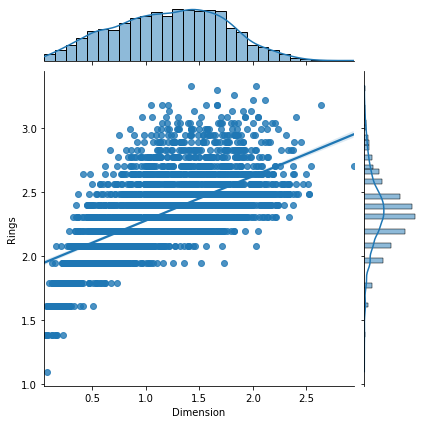

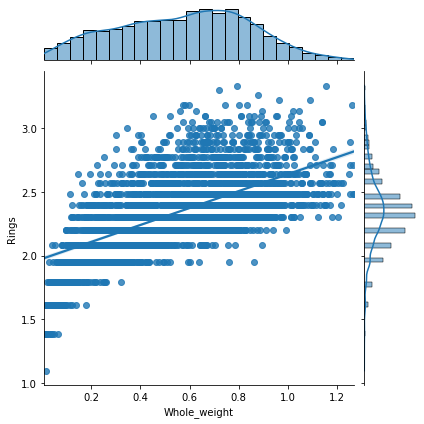

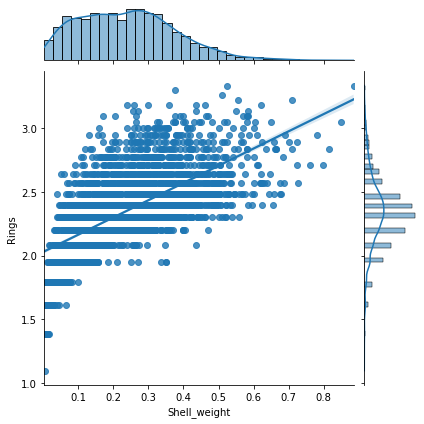

<Figure size 432x288 with 0 Axes>

In [41]:
#bivariate relationship
JG1 = sns.jointplot("Diameter", "Rings", data=Abalone_train, kind='reg')
JG2 = sns.jointplot("Dimension","Rings", data=Abalone_train, kind='reg')
JG3 = sns.jointplot("Whole_weight", "Rings", data=Abalone_train, kind='reg')
JG4 = sns.jointplot("Shell_weight", "Rings", data=Abalone_train, kind='reg')
#subplots migration
f = plt.figure()
for J in [JG1, JG2,JG3,JG4]:
    for A in J.fig.axes:
        f._axstack

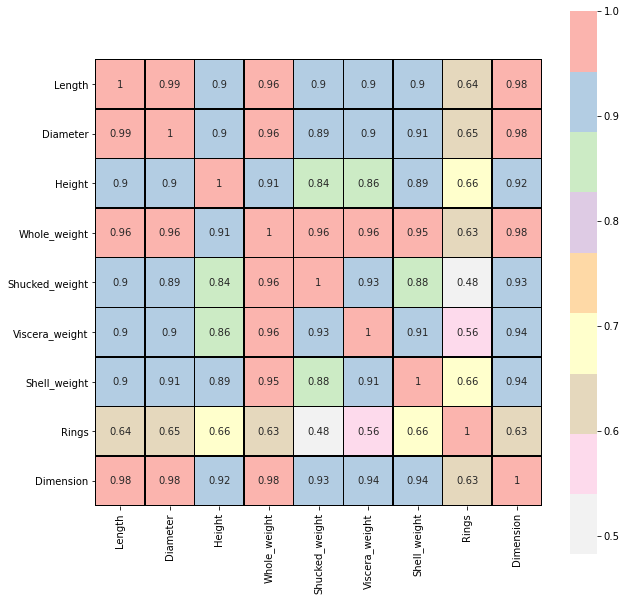

In [43]:
# Generate a heat map
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(Abalone_train.corr(), annot=True,cmap='Pastel1_r',linewidths=0.5, linecolor='black',square=True, ax=ax );


- The diameter and length, other weights columns are very highly correlated to each other(0.99). 
- Length is highly correlated with Diameter and all other fields of weights	
- Diameter is highly correlated with Length and 2 other fields	
- all dimension variables made into single variable and dropped all
- **Whole weight** is highly correlated with Length and  other fields of weights & correlated with Rings,thinking of using it one of the models	
- Shucked weight is highly correlated(0.95) with Whole weight and 1 other fields,say 'Shucked weight' be dropped, **YES**	
- Viscera weight is highly correlated (0.95)with Whole weight and 3 other fields	say 'Viscera weight' be dropped,**YES**	

- Feature Engineered Dimension has high correlation to Whole_weight, so we will use them in different models

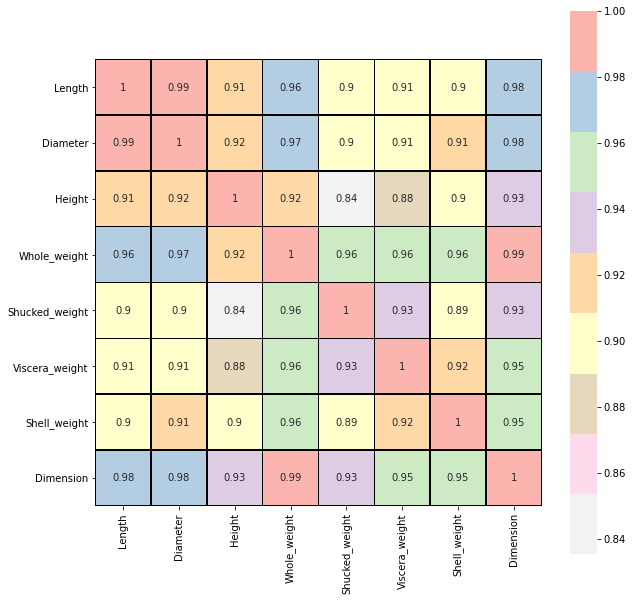

In [44]:
# Generate a heat map
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(Abalone_test.corr(), annot=True,cmap='Pastel1_r',linewidths=0.5, linecolor='black',square=True, ax=ax );


**Test data set observations**
- First thing to note here is high correlation in data. There seems to be high multicollinearity between the predictors. for example correlation between Diameter and Length is extremely high (about 98%).

- Similarly **Whole_weight** seems to be highly correlated with other weight variables (96%) and is the sum of Shucked_weight, Viscera_weight and Shell_weight.
- Feature Engineered Dimension has high correlation to Whole_weight, so we will use them in different models


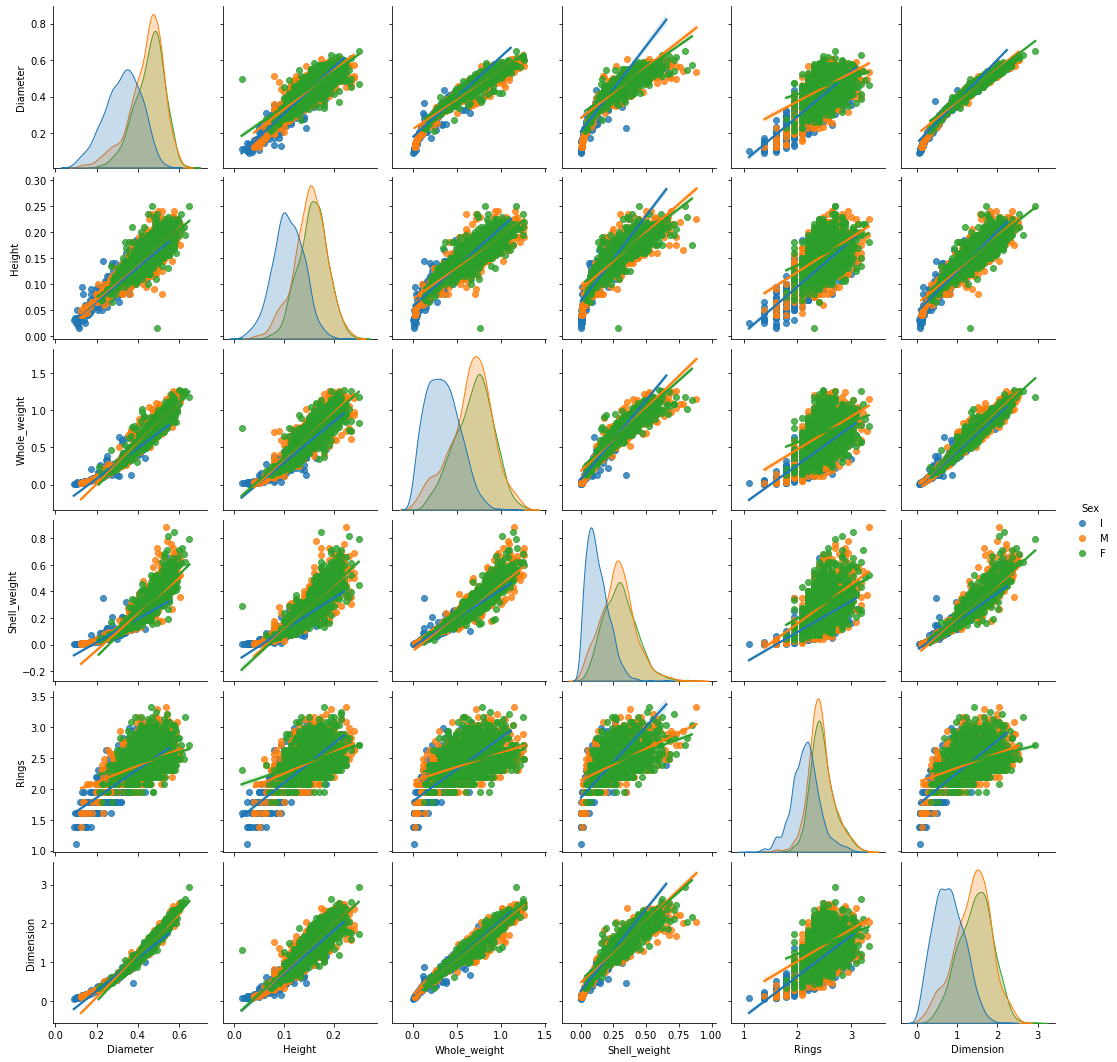

In [45]:
#pair plot for training dataset

import matplotlib.pyplot as plt
sns.pairplot(Abalone_train, vars=['Diameter','Height','Whole_weight','Shell_weight','Rings','Dimension'], hue="Sex", kind="reg",height=2.5 )


plt.show()
 



- Mainly, the **distributions of predictor Sex with factor level value of female and male are very similar with respect to all other predictors**.

- The **shape of distribution** is also significantly **similar** for factor levels of female and male.

- We could think about redefining this feature to define gender as infant vs non-infant (where non-infant = female and male both).
- seems to have rings distributed from **5 to 15**


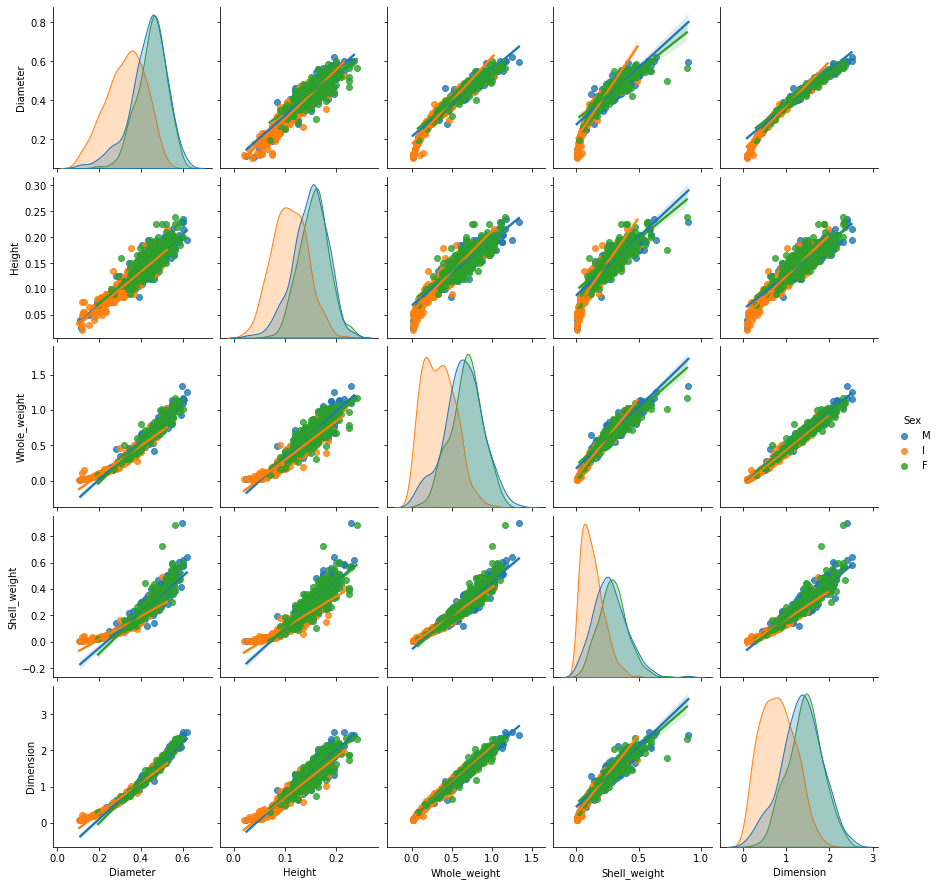

In [46]:
#pair plot for test dataset
#Abalone_test['Height']=np.log1p(Abalone_test['Height'])
#Abalone_test['Shell_weight']=np.log1p(Abalone_test['Shell_weight'])
import matplotlib.pyplot as plt
sns.pairplot(Abalone_test, vars=['Diameter','Height','Whole_weight','Shell_weight','Dimension'], hue="Sex", kind="reg",height=2.5 )

plt.show()
 

**Observations**

In [47]:
#refining the feature by OHE and dropping of redundant variable
Abalone_train=pd.get_dummies(Abalone_train,columns=['Sex'],drop_first=True)
Abalone_test=pd.get_dummies(Abalone_test,columns=['Sex'],drop_first=True)

In [48]:
Abalone_train.head()
Abalone_test.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Dimension,Sex_I,Sex_M
Id,,,,,,,,,,
668,0.550,0.425,0.155,0.651022,0.2775,0.2430,0.3350,1.276900,0,1
1580,0.500,0.400,0.120,0.479954,0.2610,0.1430,0.1935,1.040400,1,0
3784,0.620,0.480,0.155,0.813372,0.5270,0.3740,0.3175,1.575025,0,1
463,0.220,0.165,0.055,0.053067,0.0215,0.0120,0.0200,0.193600,1,0
2615,0.645,0.500,0.175,0.920482,0.6735,0.3755,0.3775,1.742400,0,1


In [49]:
#Defining X
feature_cols_test =['Sex_I','Sex_M','Whole_weight']                

X_test = Abalone_test[feature_cols_test]

print(X_test.head())


      Sex_I  Sex_M  Whole_weight
Id                              
668       0      1      0.651022
1580      1      0      0.479954
3784      0      1      0.813372
463       1      0      0.053067
2615      0      1      0.920482


In [50]:
#Defining y
feature_cols_train =['Sex_I','Sex_M','Whole_weight']                

X = Abalone_train[feature_cols_train]

print(X.head())
y = Abalone_train['Rings']
print(y.head())

      Sex_I  Sex_M  Whole_weight
Id                              
3141      1      0      0.032467
3521      1      0      0.040182
883       0      1      0.871503
3627      0      1      1.061257
2106      0      1      0.713440
Id
3141    1.791759
3521    1.386294
883     2.772589
3627    2.397895
2106    2.708050
Name: Rings, dtype: float64


In [51]:
def lr():
    print(type(y))
    print(y)
lr()

<class 'pandas.core.series.Series'>
Id
3141    1.791759
3521    1.386294
883     2.772589
3627    2.397895
2106    2.708050
          ...   
1033    2.397895
3264    2.564949
1653    2.397895
2607    2.302585
2732    2.197225
Name: Rings, Length: 3335, dtype: float64


In [52]:
def lr():
    print(type(X))
    print(X.shape)
lr()

<class 'pandas.core.frame.DataFrame'>
(3335, 3)


In [53]:
#spliting train dataset for validating purposes
from sklearn.model_selection import train_test_split
def split(X,y):
    return train_test_split(X, y, test_size=0.2, random_state=2)


In [54]:
#validation split
X_train, X_val, y_train, y_val = split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nval cases as below')
print('X_val shape: ',X_val.shape)
print('y_val shape: ',y_val.shape)

Train cases as below
X_train shape:  (2668, 3)
y_train shape:  (2668,)

val cases as below
X_val shape:  (667, 3)
y_val shape:  (667,)


In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform((X_train))
X_val=scaler.fit_transform((X_val))


In [56]:
linreg = LinearRegression()
linreg.fit(X_train, y_train) 

LinearRegression()

In [57]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 2.0966392215200202
Coefficients: [-0.12833592 -0.01929691  0.68209858]


In [58]:
feature_cols_train.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)       

In [59]:
eq1 = zip(feature_cols_train, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 2.0966392215200202
Sex_I -0.12833592235877112
Sex_M -0.019296914311156335
Whole_weight 0.6820985791569891


In [60]:
y_pred_train = linreg.predict(X_train)
y_pred_train_org = np.expm1(y_pred_train)
pred1= pd.DataFrame(y_pred_train_org)
def lr():  
    pred1.columns = ['Rings']
    head = pred1.head()
    return head
lr()

,Rings
0,8.484927
1,10.145407
2,10.258252
3,11.021736
4,12.524716


In [61]:
y_train_org=np.expm1(y_train)

In [62]:
y_pred_val = linreg.predict(X_val) 
y_pred_val_org = np.expm1(y_pred_val)
pred2= pd.DataFrame(y_pred_val_org)
def lr():  
    pred2.columns = ['Rings']
    head = pred2.head()
    return head
lr()

,Rings
0,12.030007
1,11.579448
2,11.590605
3,6.162373
4,9.237192


In [63]:
y_val_org=np.expm1(y_val)

In [64]:
y_pred_test = linreg.predict(X_test) 
y_pred_test_org = np.expm1(y_pred_test)
pred3= pd.DataFrame(y_pred_test_org)
def lr():  
    pred3.columns = ['Rings']
    head = pred3.head()
    return head
lr()

,Rings
0,11.446054
1,8.931179
2,12.903519
3,6.422382
4,13.957334


In [65]:
#rounding off the predicted values for val set
#predicted_val = np.round_(y_pred_val)
#predicted_val

Text(0, 0.5, 'Predicted Values')

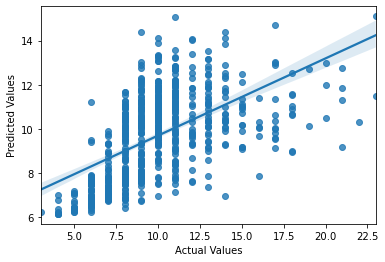

In [66]:
sns.regplot(y_val_org,y_pred_val_org)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [67]:
from sklearn import metrics

In [68]:
MSE_train = metrics.mean_squared_error(y_train_org, y_pred_train_org)
MSE_val = metrics.mean_squared_error(y_val_org, y_pred_val_org)

In [69]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for val set is {}'.format(MSE_val))

MSE for training set is 7.108268843921207
MSE for val set is 6.937225246971816


In [70]:
r2_train = metrics.r2_score(y_train_org,y_pred_train_org)
r2_val = metrics.r2_score(y_val_org,y_pred_val_org)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for validation set is {}".format(r2_val))

R2 score for training set is 0.3096953586628117
R2 score for validation set is 0.30874764873493543


In [71]:
RMSE_train = MSE_train**0.5
RMSE_val = MSE_val**0.5
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for val set is {}'.format(RMSE_val))

RMSE for training set is 2.6661336883061972
RMSE for val set is 2.633861280890058


In [72]:
feature_cols1 =['Dimension','Sex_I','Sex_M']  
feature_cols_test1=['Dimension','Sex_M','Sex_I']
X1_test = Abalone_test[feature_cols_test1]
X1 = Abalone_train[feature_cols1]

print(X1.head())
y1 = Abalone_train['Rings']
print(y.head())

      Dimension  Sex_I  Sex_M
Id                           
3141   0.156025      1      0
3521   0.176400      1      0
883    1.849600      0      1
3627   2.073600      0      1
2106   1.452025      0      1
Id
3141    1.791759
3521    1.386294
883     2.772589
3627    2.397895
2106    2.708050
Name: Rings, dtype: float64


In [73]:
#spliting train dataset for validating purposes
from sklearn.model_selection import train_test_split
def split(X1,y1):
    return train_test_split(X1, y1, test_size=0.2, random_state=3)


In [74]:
#validation split
X1_train, X1_val, y1_train, y1_val = split(X1,y1)
print('Train cases as below')
print('X_train shape: ',X1_train.shape)
print('y_train shape: ',y1_train.shape)
print('\nval cases as below')
print('X_val shape: ',X1_val.shape)
print('y_val shape: ',y1_val.shape)

Train cases as below
X_train shape:  (2668, 3)
y_train shape:  (2668,)

val cases as below
X_val shape:  (667, 3)
y_val shape:  (667,)


In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X1_train=scaler.fit_transform((X1_train))
X1_val=scaler.fit_transform((X1_val))
X_test=scaler.fit_transform((X1_test))

In [76]:
linreg = LinearRegression()
linreg.fit(X1_train, y1_train)

LinearRegression()

In [77]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 2.062796647031361
Coefficients: [ 0.82945934 -0.12308223 -0.01701628]


In [78]:
feature_cols1.insert(0,'Intercept')
coef1 = linreg.coef_.tolist()            
coef1.insert(0, linreg.intercept_)       

In [79]:
eq1 = zip(feature_cols1, coef1)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 2.062796647031361
Dimension 0.8294593407621891
Sex_I -0.12308222732825852
Sex_M -0.017016283741068814


In [80]:
y_test_pred = abs(linreg.predict(X_test) )
y_test_org_pred = np.expm1(y_test_pred)

In [81]:
y_pred3_test=pd.DataFrame((y_test_org_pred) , columns=['Rings'])
y_pred3_test.head()

,Rings
0,9.466388
1,9.736344
2,10.585699
3,7.044922
4,11.265785


In [82]:
y_pred3_test.to_csv('result1.csv')

In [83]:
y1_pred_train = linreg.predict(X1_train)
y_train_org_pred = np.expm1(y1_pred_train)
pred1a= pd.DataFrame(y_train_org_pred)
def lr():  
    pred1a.columns = ['Rings']
    head = pred1a.head()
    return head
lr()

,Rings
0,7.580109
1,9.478441
2,9.332088
3,12.112054
4,7.494301


In [84]:
y1_pred_val = linreg.predict(X1_val)
y_val_org_pred = np.expm1(y1_pred_val)
pred2a= pd.DataFrame(y_val_org_pred)
def lr():  
    pred2a.columns = ['Rings']
    head = pred2a.head()
    return head
lr()

,Rings
0,10.118101
1,12.092537
2,8.356951
3,12.608271
4,12.150651


In [85]:
y1_train_org=np.expm1(y1_train)

In [86]:
y1_val_org=np.expm1(y1_val)

Text(0, 0.5, 'Predicted Values')

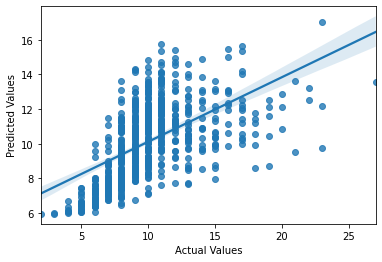

In [87]:
sns.regplot(y1_val_org,y_val_org_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

**Observations**


In [88]:
MSE_train1 = metrics.mean_squared_error(y1_train_org,y_train_org_pred )
MSE_val1 = metrics.mean_squared_error(y1_val_org, y_val_org_pred)

In [89]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_val))

MSE for training set is 7.108268843921207
MSE for test set is 6.937225246971816


In [90]:
r2_train1 = metrics.r2_score(y1_train_org,y_train_org_pred)
r2_val1 = metrics.r2_score(y1_val_org,y_val_org_pred)
print("R2 score for training set is {}".format(r2_train1))
print("R2 score for validation set is {}".format(r2_val1))

R2 score for training set is 0.30190689020786
R2 score for validation set is 0.30364616174843073


In [93]:
df1 = pd.DataFrame({'Actual':y1_train_org,'Predicted':np.rint(y_train_org_pred)})
df2= pd.DataFrame({'Actual1':y1_val_org , 'Predicted1': np.rint(y_val_org_pred)})
print(df1,df2)


      Actual  Predicted
Id                     
2049     8.0        8.0
2126    10.0        9.0
804     10.0        9.0
1974    10.0       12.0
2562     6.0        7.0
...      ...        ...
3612    10.0       11.0
1661    10.0       11.0
2893     8.0       10.0
2267    15.0       11.0
3256    12.0       11.0

[2668 rows x 2 columns]       Actual1  Predicted1
Id                       
3200     10.0        10.0
1694      9.0        12.0
54        7.0         8.0
3701     10.0        13.0
757      15.0        12.0
...       ...         ...
3921     10.0         8.0
3615      9.0        12.0
1824      5.0         6.0
2282     10.0        10.0
1592      9.0         9.0

[667 rows x 2 columns]


In [92]:
# Train DataFrames 
#X_train =Abalone_train[['Diameter','Height','Whole_weight', 'Shell_weight']]
#y_train = Abalone_train[['Rings']]